In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

model = Sequential() 
optimizer='adam'
loss='mse'
N_STEPS = 90
N_FEATURES = 1

# jak OUTPUT AVERAGING TRUE TO TRZEBA POKOMBINOWAĆ
#OUTPUT_SIZE = OUTPUT_WINDOW_SIZE if not OUTPUT_AVERAGING else 1

#X =  X.reshape((X.shape[0], X.shape[1], N_FEATURES))


# model.add(LSTM(50, input_shape=(N_STEPS, N_FEATURES), return_sequences=True))
# model.add(LSTM(30))
# model.add(Dense(OUTPUT_SIZE))

model.add(GRU(30, input_shape=(N_STEPS, N_FEATURES), return_sequences=True))
# model.add(GRU(30, return_sequences=True))
model.add(GRU(2))

model.compile(optimizer=optimizer, loss=loss) 

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 90, 30)            2880      
_________________________________________________________________
gru_3 (GRU)                  (None, 2)                 198       
Total params: 3,078
Trainable params: 3,078
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
for l in model.layers:
    print(f"shape: {l.input_spec[0].shape})") #axes[-1]
    #print("kernel", l.input_spec.axes[-1])
    #print("batch", l.kernel.shape)

shape: (None, None, 1))
shape: (None, None, 30))


In [90]:
for l in model.layers:
    print("shape", l.state_spec[0].shape)
    print("ndim", l.state_spec[0].ndim)

shape [None, 30]
ndim 2
shape [None, 2]
ndim 2


In [43]:
model.layers[0]._build_input_shape

AttributeError: 'GRU' object has no attribute '_build_input_shape'

In [42]:
model.layers[0].__dict__

{'_obj_reference_counts_dict': <tensorflow.python.training.tracking.object_identity.ObjectIdentityDictionary at 0x1b569207cf8>,
 'zero_output_for_mask': False,
 '_self_setattr_tracking': True,
 '_trainable': True,
 '_name': 'gru',
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_callable_losses': [],
 '_losses': [],
 '_eager_losses': [],
 '_metrics': [],
 '_metrics_tensors': {},
 '_mixed_precision_policy': <tensorflow.python.keras.mixed_precision.experimental.policy.Policy at 0x1b5617075f8>,
 '_call_convention': <CallConvention.EXPLICIT_INPUTS_ARGUMENT: 1>,
 '_layers': [<tensorflow.python.keras.layers.recurrent.GRUCell at 0x1b5692077b8>,
  ListWrapper([InputSpec(shape=(None, None, 1), ndim=3)]),
  ListWrapper([InputSpec(shape=[None, 30], ndim=2)])],
 '_inbound_nodes': [<tensorflow.python.keras.engine.base_layer.Node at 0x1b5694c3be0>],
 '_outbound_nodes': [<tensorflow.python.keras.engine.base_layer.Node at 0x1b569783c50>],
 '_expects_training_arg': True,
 '

In [37]:
model.__dict__

{'_self_setattr_tracking': True,
 '_name': 'sequential',
 '_activity_regularizer': None,
 '_trainable': True,
 '_dynamic': False,
 '_is_compiled': True,
 '_expects_training_arg': True,
 '_layers': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x1b569207e10>,
 '_compute_output_and_mask_jointly': True,
 'supports_masking': False,
 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x1b561b5e978>,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_losses': [],
 '_eager_losses': [],
 '_callable_losses': [],
 '_metrics': [],
 '_metrics_tensors': {},
 '_scope': None,
 '_reuse': None,
 '_graph': <tensorflow.python.framework.ops.Graph at 0x1b55c9855f8>,
 '_dtype': None,
 '_outbound_nodes': [],
 '_inbound_nodes': [<tensorflow.python.keras.engine.base_layer.Node at 0x1b5694c3cc0>],
 '_trackable_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x1b5695abf28>,
 '_mixed_precision_policy': <tensorflow.python.keras.mixed_precisio

In [21]:
string='../models_results/LSTM/Experiment_0_use_log_LSTM_input_window_size_90_output_window_size_30_freq_30_n_steps_90_output_size_30_use_log_True_architecture_GRU+Dense_optimizer_Adam_experiment_results_2021-11-20_21-16.csv'

In [22]:
len(string)

216

Train on 8 samples, validate on 2 samples
Epoch 1/5
 - 1s - loss: 0.2684 - mse: 0.2684 - mae: 0.4617 - mape: 102.5998 - cosine: -1.0000e+00 - val_loss: 0.9070 - val_mse: 0.9070 - val_mae: 0.9510 - val_mape: 100.1044 - val_cosine: -1.0000e+00
Epoch 2/5
 - 0s - loss: 0.2527 - mse: 0.2527 - mae: 0.4463 - mape: 98.2372 - cosine: 1.0000 - val_loss: 0.8624 - val_mse: 0.8624 - val_mae: 0.9273 - val_mape: 97.6061 - val_cosine: 1.0000
Epoch 3/5
 - 0s - loss: 0.2374 - mse: 0.2374 - mae: 0.4309 - mape: 93.8701 - cosine: 1.0000 - val_loss: 0.8188 - val_mse: 0.8188 - val_mae: 0.9036 - val_mape: 95.1067 - val_cosine: 1.0000
Epoch 4/5
 - 0s - loss: 0.2226 - mse: 0.2226 - mae: 0.4154 - mape: 89.5011 - cosine: 1.0000 - val_loss: 0.7765 - val_mse: 0.7765 - val_mae: 0.8799 - val_mape: 92.6077 - val_cosine: 1.0000
Epoch 5/5
 - 0s - loss: 0.2083 - mse: 0.2083 - mae: 0.4000 - mape: 85.1335 - cosine: 1.0000 - val_loss: 0.7352 - val_mse: 0.7352 - val_mae: 0.8562 - val_mape: 90.1109 - val_cosine: 1.0000


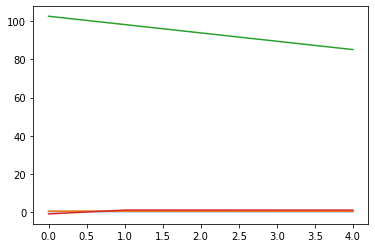

In [64]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot
# prepare sequence
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# create model
model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
# train model
history = model.fit(X, X, epochs=5, validation_split=0.2, batch_size=len(X), verbose=2)
# plot metrics
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
pyplot.plot(history.history['mape'])
pyplot.plot(history.history['cosine'])
# pyplot.plot(history.history['mean_squared_error'])
# pyplot.plot(history.history['mean_absolute_error'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

In [65]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.layers

In [88]:
for l in model.layers:
    print(f"shape: (None, {l.input_spec.axes[-1]})")
    #print("kernel", l.input_spec.axes[-1])
    #print("batch", l.kernel.shape)


shape: (None, 1)
shape: (None, 10)
shape: (None, 5)


In [60]:
model.layers[0].__dict__

{'input_spec': InputSpec(min_ndim=2, axes={-1: 1}),
 'supports_masking': True,
 'stateful': False,
 '_trainable_weights': [<tf.Variable 'dense_10/kernel:0' shape=(1, 2) dtype=float32>,
  <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32>],
 '_non_trainable_weights': [],
 '_losses': [],
 '_updates': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_built': True,
 '_metrics': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x1b56793c048>],
 '_outbound_nodes': [<keras.engine.base_layer.Node at 0x1b5678c9a90>],
 'name': 'dense_10',
 'trainable': True,
 'batch_input_shape': (None, 1),
 'dtype': 'float32',
 '_initial_weights': None,
 'units': 2,
 'activation': <function keras.activations.linear(x)>,
 'use_bias': True,
 'kernel_initializer': <keras.initializers.VarianceScaling at 0x1b5678f82e8>,
 'bias_initializer': <keras.initializers.Zeros at 0x1b5678f8198>,
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': 

In [57]:
for l in model.layers:
    print("shape", l.state_spec[0].shape)
    print("ndim", l.state_spec[0].ndim)

AttributeError: 'Dense' object has no attribute 'state_spec'

In [7]:
[(l.name, l._build_input_shape.dims[1].value) for l in model.layers]

AttributeError: 'Dense' object has no attribute '_build_input_shape'

In [22]:
print(model._build_input_shape)

None


In [29]:
for l in model.layers:
    print(l.name)
    #print(l._build_input_shape)
    display(l.__dict__)
    #break

dense_7


{'input_spec': InputSpec(min_ndim=2, axes={-1: 1}),
 'supports_masking': True,
 'stateful': False,
 '_trainable_weights': [<tf.Variable 'dense_7/kernel:0' shape=(1, 2) dtype=float32>,
  <tf.Variable 'dense_7/bias:0' shape=(2,) dtype=float32>],
 '_non_trainable_weights': [],
 '_losses': [],
 '_updates': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_built': True,
 '_metrics': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x1b567bcf940>],
 '_outbound_nodes': [<keras.engine.base_layer.Node at 0x1b567bed4e0>],
 'name': 'dense_7',
 'trainable': True,
 'batch_input_shape': (None, 1),
 'dtype': 'float32',
 '_initial_weights': None,
 'units': 2,
 'activation': <function keras.activations.linear(x)>,
 'use_bias': True,
 'kernel_initializer': <keras.initializers.VarianceScaling at 0x1b567bae278>,
 'bias_initializer': <keras.initializers.Zeros at 0x1b567baea20>,
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': Non

dense_8


{'input_spec': InputSpec(min_ndim=2, axes={-1: 2}),
 'supports_masking': True,
 'stateful': False,
 '_trainable_weights': [<tf.Variable 'dense_8/kernel:0' shape=(2, 1) dtype=float32>,
  <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32>],
 '_non_trainable_weights': [],
 '_losses': [],
 '_updates': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_built': True,
 '_metrics': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x1b567bed4e0>],
 '_outbound_nodes': [<keras.engine.base_layer.Node at 0x1b567c07b70>],
 'name': 'dense_8',
 'trainable': True,
 'dtype': 'float32',
 '_initial_weights': None,
 'units': 1,
 'activation': <function keras.activations.linear(x)>,
 'use_bias': True,
 'kernel_initializer': <keras.initializers.VarianceScaling at 0x1b567bcf748>,
 'bias_initializer': <keras.initializers.Zeros at 0x1b567bcf390>,
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None,
 'ke

dense_9


{'input_spec': InputSpec(min_ndim=2, axes={-1: 1}),
 'supports_masking': True,
 'stateful': False,
 '_trainable_weights': [<tf.Variable 'dense_9/kernel:0' shape=(1, 1) dtype=float32>,
  <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32>],
 '_non_trainable_weights': [],
 '_losses': [],
 '_updates': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_built': True,
 '_metrics': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x1b567c07b70>],
 '_outbound_nodes': [],
 'name': 'dense_9',
 'trainable': True,
 'dtype': 'float32',
 '_initial_weights': None,
 'units': 1,
 'activation': <function keras.activations.linear(x)>,
 'use_bias': True,
 'kernel_initializer': <keras.initializers.VarianceScaling at 0x1b567bcfa90>,
 'bias_initializer': <keras.initializers.Zeros at 0x1b567bedcc0>,
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None,
 'kernel': <tf.Variable 'dense_9/kernel:0' shape=(1

In [34]:
l.kernel

<tf.Variable 'dense_9/kernel:0' shape=(1, 1) dtype=float32>

In [28]:
l.input_spec

InputSpec(min_ndim=2, axes={-1: 1})

In [5]:
model._layers

In [6]:
model.name

'sequential_1'

In [18]:
model.__dict__

{'name': 'sequential_6',
 'trainable': True,
 'dtype': 'float32',
 '_is_compiled': True,
 '_expects_training_arg': False,
 '_initial_weights': None,
 'supports_masking': False,
 'optimizer': <keras.optimizers.Adam at 0x1b567bedb70>,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_losses': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_metrics': [],
 '_layers': [<keras.engine.input_layer.InputLayer at 0x1b567baef98>,
 '_outbound_nodes': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x1b567baefd0>],
 '_is_graph_network': True,
 '_uses_inputs_arg': True,
 'outputs': [<tf.Tensor 'dense_9/BiasAdd:0' shape=(?, 1) dtype=float32>],
 'inputs': [<tf.Tensor 'dense_7_input:0' shape=(?, 1) dtype=float32>],
 '_built': True,
 '_build_input_shape': None,
 '_compute_previous_mask': True,
 '_input_layers': [<keras.engine.input_layer.InputLayer at 0x1b567baef98>],
 '_output_layers': [<keras.layers.core.Dense at 0x1b567baec18>],
 '_input_coordinates': 

In [17]:
history.history

{'val_loss': [1.5777416229248047,
  1.5609050989151,
  1.5441848039627075,
  1.5285983085632324,
  1.5121097564697266],
 'val_mse': [1.5777416229248047,
  1.5609050989151,
  1.5441848039627075,
  1.5285983085632324,
  1.5121097564697266],
 'val_mae': [1.2543377876281738,
  1.247619390487671,
  1.2409112453460693,
  1.2346251010894775,
  1.227940320968628],
 'val_mape': [132.03472900390625,
  131.32669067382812,
  130.6197509765625,
  129.957275390625,
  129.25277709960938],
 'val_cosine': [1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.4493333101272583,
  0.44319283962249756,
  0.4371070861816406,
  0.4310762882232666,
  0.4254662096500397],
 'mse': [0.4493333, 0.44319284, 0.4371071, 0.4310763, 0.4254662],
 'mae': [0.5973471, 0.59266585, 0.5879917, 0.583325, 0.5789523],
 'mape': [132.7438, 131.3699, 129.99814, 128.62863, 127.34544],
 'cosine': [1.0, 1.0, 0.99999994, 1.0, 1.0]}

In [18]:
history.history['val_mape']

[132.03472900390625,
 131.32669067382812,
 130.6197509765625,
 129.957275390625,
 129.25277709960938]

In [15]:
history.history['mse']

[0.4493333, 0.44319284, 0.4371071, 0.4310763, 0.4254662]

In [16]:
history.history['mse'][-1]

0.4254662

In [ ]:
from sklearn import metrics

In [108]:
def denormalize_x(array, x_max, x_min):
    denorm_array = np.multiply(array, (x_max - x_min)[:, None]) + x_min[:, None]
    return denorm_array

In [116]:
X = np.empty([2997,90,1])

In [117]:
X.shape

(2997, 90, 1)

In [119]:
X_test = X.reshape((X.shape[0], X.shape[1]))

In [121]:
X_test.shape

(2997, 90)

In [123]:
X.reshape((X_test.shape[0], X_test.shape[1], 1)).shape

(2997, 90, 1)

In [17]:
path = '../data/5_cleaned_data\ABMD.csv'
company_name = path.split('../data/5_cleaned_data\\')[1].replace(".csv", "")
#company_name = company_name.replace(".csv", "")
company_name

'ABMD'

In [2]:
from datetime import datetime
datetime.now().hour, datetime.now().minute

(13, 3)

In [11]:
print(f"Exec_runtime: {datetime.now().hour}h {datetime.now().minute}min")

Exec_runtime: 11h 4min


In [4]:
start_time = datetime.now()

In [28]:
end_time = datetime.now()
execution_time = end_time - start_time

In [34]:
hours = execution_time.seconds // 3600
hours

0

In [37]:
minutes = (execution_time.seconds % 3600) // 60
minutes

7

In [40]:
seconds = (execution_time.seconds % 3600) % 60
seconds

36

In [42]:
execution_time_h = f"{hours}h {minutes}min {seconds}s"
execution_time_h

'0h 7min 36s'

In [23]:
execution_time

datetime.timedelta(0, 305, 468906)

In [27]:
f"{execution_time.days*24 + execution_time.seconds/3600} hours"

'0.08472222222222223 hours'

In [13]:
execution_time.seconds

96

In [7]:
execution_time.days * 24 + execution_time.seconds/3600

0.0008333333333333334

In [24]:
import matplotlib.pyplot as plt
import numpy as np
X_test = np.array([5, 7,5,3,14,15,35,24,35,46,35,26,2,6,5,5,4,3])
Y_test = np.array([3, 6, 8, 3, 9 , 12 ,15 , 16]) #, [2, 4, 5, 6,7,8,3,4]
Y_predict = np.array([14, 8, 9, 7, 9, 16, 12 , 56]) #, [3,7,3,8,12,24,35,64]

In [74]:
len(X_test)

18

In [81]:
len(Y_test)

8

In [35]:
X_test_len = range(len(X_test))
print(X_test_len[-1])
Y_test_len = range(X_test_len[-1], X_test_len[-1]+len(Y_test))
print(Y_test_len)
#Y_predict_len = range(len(Y_test)-len(Y_predict), len(Y_test))
Y_predict_len = range(X_test_len[-1], X_test_len[-1]+len(Y_predict))


17
range(17, 25)


In [45]:
import pandas as pd
df = pd.read_csv('normalisation_input_window_size_90_output_window_size_30_freq_30_output_averaging_False_input_averaging_False_use_log_False.csv', index_col=0)
df

,x_min,x_max,company_name,input_period_start_date,input_period_end_date,output_period_start_date,output_period_end_date
0,12.729134,15.393403,../data/5_cleaned_data\ABMD,2008-01-02,2008-03-31,2008-04-01,2008-04-30
1,12.729134,15.267558,../data/5_cleaned_data\ABMD,2008-02-01,2008-04-30,2008-05-01,2008-05-30
2,12.729134,15.213822,../data/5_cleaned_data\ABMD,2008-03-02,2008-05-30,2008-05-31,2008-06-29
3,13.011633,19.594873,../data/5_cleaned_data\ABMD,2008-04-01,2008-06-29,2008-06-30,2008-07-29
4,13.667083,19.758955,../data/5_cleaned_data\ABMD,2008-05-01,2008-07-29,2008-07-30,2008-08-28
...,...,...,...,...,...,...,...
9074,286.256340,411.422362,../data/5_cleaned_data\ZM,2021-02-23,2021-05-23,2021-05-24,2021-06-22
9075,286.256340,374.782893,../data/5_cleaned_data\ZM,2021-03-25,2021-06-22,2021-06-23,2021-07-22
9076,286.256340,399.897178,../data/5_cleaned_data\ZM,2021-04-24,2021-07-22,2021-07-23,2021-08-21
9077,320.963768,399.897178,../data/5_cleaned_data\ZM,2021-05-24,2021-08-21,2021-08-22,2021-09-20


In [47]:
type(df.input_period_start_date[0])

str

In [13]:
from datetime import datetime
from pandas import DateOffset
import pandas as pd

In [4]:
input_period_start_date_test = '2008-01-02' 
input_period_end_date_test = '2008-01-19'

In [14]:
pd.Timestamp(input_period_start_date_test)

Timestamp('2008-01-02 00:00:00')

In [22]:
n_steps = 13
input_per_range = []
input_per_range.append(pd.Timestamp(input_period_start_date_test))
for period in range(n_steps):
    input_per_range.append(pd.Timestamp(input_period_start_date_test) + DateOffset(days=30*(period+1)))
input_period_range = pd.DatetimeIndex(input_per_range)
input_period_range

DatetimeIndex(['2008-01-02', '2008-02-01', '2008-03-02', '2008-04-01',
               '2008-05-01', '2008-05-31', '2008-06-30', '2008-07-30',
               '2008-08-29', '2008-09-28', '2008-10-28', '2008-11-27',
               '2008-12-27', '2009-01-26'],
              dtype='datetime64[ns]', freq=None)

In [16]:
input_per_range

[Timestamp('2008-01-02 00:00:00'),
 Timestamp('2008-01-03 00:00:00'),
 Timestamp('2008-01-04 00:00:00'),
 Timestamp('2008-01-05 00:00:00'),
 Timestamp('2008-01-06 00:00:00'),
 Timestamp('2008-01-07 00:00:00'),
 Timestamp('2008-01-08 00:00:00'),
 Timestamp('2008-01-09 00:00:00'),
 Timestamp('2008-01-10 00:00:00'),
 Timestamp('2008-01-11 00:00:00'),
 Timestamp('2008-01-12 00:00:00'),
 Timestamp('2008-01-13 00:00:00'),
 Timestamp('2008-01-14 00:00:00'),
 Timestamp('2008-01-15 00:00:00')]

In [19]:
pd.DatetimeIndex(input_per_range)

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-05',
               '2008-01-06', '2008-01-07', '2008-01-08', '2008-01-09',
               '2008-01-10', '2008-01-11', '2008-01-12', '2008-01-13',
               '2008-01-14', '2008-01-15'],
              dtype='datetime64[ns]', freq=None)

In [84]:
input_period_range = pd.date_range(datetime.strptime(input_period_start_date_test, '%Y-%m-%d'), 
                                   datetime.strptime(input_period_end_date_test, '%Y-%m-%d'))
input_period_range

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-05',
               '2008-01-06', '2008-01-07', '2008-01-08', '2008-01-09',
               '2008-01-10', '2008-01-11', '2008-01-12', '2008-01-13',
               '2008-01-14', '2008-01-15', '2008-01-16', '2008-01-17',
               '2008-01-18', '2008-01-19'],
              dtype='datetime64[ns]', freq='D')

In [85]:
output_period_start_date_test = '2008-01-20' 
output_period_end_date_test = '2008-01-27'

In [125]:
output_period_range = pd.date_range(datetime.strptime(output_period_start_date_test, '%Y-%m-%d'), 
                                   datetime.strptime(output_period_end_date_test, '%Y-%m-%d'))
output_period_range

DatetimeIndex(['2008-01-20', '2008-01-21', '2008-01-22', '2008-01-23',
               '2008-01-24', '2008-01-25', '2008-01-26', '2008-01-27'],
              dtype='datetime64[ns]', freq='D')

In [130]:
len(output_period_range)

8

In [131]:
output_period_range[:7]

DatetimeIndex(['2008-01-20', '2008-01-21', '2008-01-22', '2008-01-23',
               '2008-01-24', '2008-01-25', '2008-01-26'],
              dtype='datetime64[ns]', freq='D')

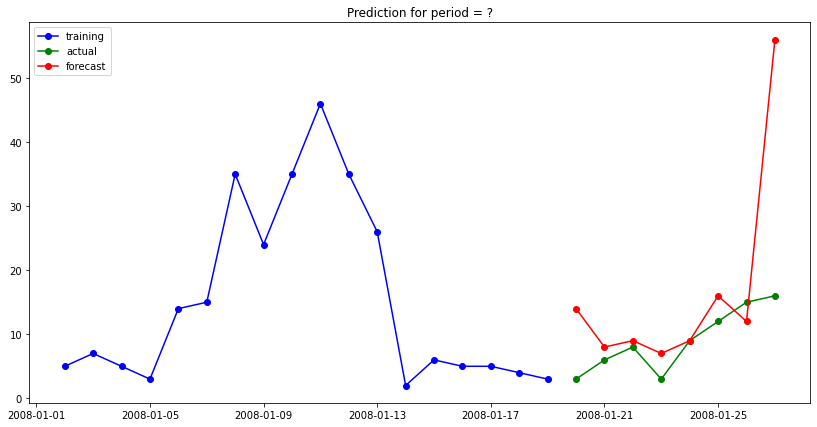

<function matplotlib.pyplot.close(fig=None)>

In [104]:
fig = plt.figure(figsize=(14,7))
#plt.plot(len(Y_test), Y_test, "b", len(Y_predict), Y_predict, "g")
plt.title("Prediction for period = ?")
plt.plot(input_period_range, X_test, "bo-", label='training') #"bo"
plt.plot(output_period_range, Y_test, "go-", label='actual') #"go"
plt.plot(output_period_range, Y_predict, "ro-", label='forecast') #"rs-"
plt.legend()
#plt.plot(ts, true, "b", ts_predicted, predicted, "g")
#plt.ylim(min,max) #zakres y od min do max
#plt.savefig()
plt.show()
plt.close

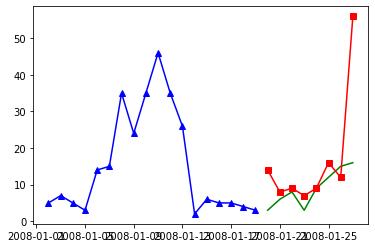

In [107]:
plt.plot(input_period_range, X_test, "b^-", output_period_range, Y_test, 'g-', output_period_range, Y_predict, "rs-")

In [50]:
df = pd.DataFrame()
for i in range(len(Y_test)):
    #print(zip(Y_test[i],Y_predict[i]))
    print(list(zip(Y_test[i],Y_predict[i])))
    data_tuples = list(zip(Y_test[i],Y_predict[i]))
    df = df.append(data_tuples, ignore_index=True)
df.columns = ['y_true', 'y_predict']
print(df)

[(3, 14), (6, 8), (8, 9), (3, 7), (9, 9), (12, 16), (15, 12), (16, 56)]
[(2, 3), (4, 7), (5, 3), (6, 8), (7, 12), (8, 24), (3, 35), (4, 64)]
    y_true  y_predict
0        3         14
1        6          8
2        8          9
3        3          7
4        9          9
5       12         16
6       15         12
7       16         56
8        2          3
9        4          7
10       5          3
11       6          8
12       7         12
13       8         24
14       3         35
15       4         64


In [2]:
import pandas as pd
months = ['Jan','Apr','Mar','June']
days = [31,30,31,30]
d = {'Month':months,'Day':days}
df = pd.DataFrame(d)
df

,Month,Day
0,Jan,31
1,Apr,30
2,Mar,31
3,June,30


In [4]:
list(df['Month'].values)

['Jan', 'Apr', 'Mar', 'June']

In [7]:
import numpy as np
np.array(list(df['Month'].values))

array(['Jan', 'Apr', 'Mar', 'June'], dtype='<U4')

# MODELLING

In [6]:
# from utils import DATA_PATH # utils.py

In [104]:
import pandas as pd
import numpy as np
import glob

DATA_PATH = './data'
PREPROCESSED_DATA_PATH = DATA_PATH + '/4_preprocessed_data'

In [23]:
PREPROCESSED_DATA_PATHS = glob.glob(PREPROCESSED_DATA_PATH + "/*.csv")

In [24]:
import datetime as dt
import matplotlib.pyplot as plt

INPUT_WINDOW_SIZE=90  # tutaj bierzemy dni
OUTPUT_WINDOW_SIZE=2  # ulec zmianie że nie w dniach ale w miesiącach uśrednionych albo coś
OUTPUT_AVERAGING=False
USE_LOG=False
FREQ=30 #okno miesięczne

In [21]:
X_df = pd.DataFrame()
Y_df = pd.DataFrame()
for path in PREPROCESSED_DATA_PATHS:
    df = pd.read_csv(path, index_col=0)
    df.timestamp = pd.to_datetime(df.timestamp)
    df.sort_values(by='timestamp', inplace=True)
    if USE_LOG:
        df.avg_price = np.log(df.avg_price)
    start_date = df.timestamp[0]
    end_date = df.timestamp[len(df)-1]-dt.timedelta(INPUT_WINDOW_SIZE)
    for i in range(0, df.shape[0], FREQ):
        if i > df.shape[0]-INPUT_WINDOW_SIZE-OUTPUT_WINDOW_SIZE:
            break      
        input_period = df.loc[i:i+INPUT_WINDOW_SIZE-1, :].reset_index().avg_price
        output_period = df.loc[i+INPUT_WINDOW_SIZE: i+INPUT_WINDOW_SIZE+OUTPUT_WINDOW_SIZE-1, :].reset_index().avg_price        
        input_period_min = input_period.min()
        input_period_max = input_period.max()
        input_period = (input_period - input_period_min) / (input_period.max()-input_period_min)
        output_period = (output_period - input_period_min) / (input_period_max-input_period_min)
        
        # zrobić dicta z nazwą spółki (z pliku) numer sampla (i) i wartości tych do sklaowania min i max + info czy było logarytmizowane
        
#         assert input_period.isna().sum()==0, 'nans detected'
#         assert output_period.isna().sum()==0, 'nans detected'
#         if len(input_period)!=90 or len(output_period)!=OUTPUT_WINDOW_SIZE:
#             break
        X_df = X_df.append(input_period)
        Y_df = Y_df.append(output_period)
        
X_df = X_df.reset_index(drop=True)
Y_df = Y_df.reset_index(drop=True)

KeyboardInterrupt: 

In [100]:
import pickle 

def pickle_array(array, filename):
    with open(filename,'wb') as f: pickle.dump(array, f)

def unpickle_array(filename):
    with open(filename,'rb') as f: array = pickle.load(f)
    return array

In [29]:
# pickle_array(X_df, f'./pickles/X_df_IN_{INPUT_WINDOW_SIZE}_OUT_{OUTPUT_WINDOW_SIZE}.pickle')
# pickle_array(Y_df, f'./pickles/Y_df_IN_{INPUT_WINDOW_SIZE}_OUT_{OUTPUT_WINDOW_SIZE}.pickle')
X = unpickle_array(f'./samples/X_input_window_size_90_output_window_size_2_freq_30_output_averaging_False_use_log_False_.pickle')
Y = unpickle_array(f'./samples/Y_input_window_size_90_output_window_size_2_freq_30_output_averaging_False_use_log_False_.pickle')

# 3 miesiące do przodu.
#    - Y: 3 kolejne wartości miesięczne (uśrednione z dziennych)

In [105]:
X.shape, Y.shape, np.isnan(X).sum(), np.isnan(Y).sum()

((11072, 90), (11072, 30), 0, 0)

# Model

<AxesSubplot:ylabel='Frequency'>

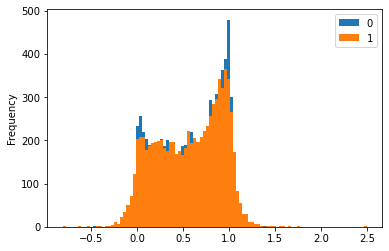

In [31]:
pd.DataFrame(Y).plot.hist(bins=100);

In [102]:
X = unpickle_array("samples\X_input_window_size_90_output_window_size_30_freq_30_input_averaging_False_output_averaging_False_use_log_True.pickle")
Y = unpickle_array("samples\Y_input_window_size_90_output_window_size_30_freq_30_input_averaging_False_output_averaging_False_use_log_True.pickle")

In [109]:
Y

array([[ 0.11550062,  0.14318773,  0.24311194, ...,  0.86528221,
         0.86013533,  0.80359373],
       [ 0.86935702,  0.98061016,  0.96524268, ...,  0.644529  ,
         0.87603607,  0.81924345],
       [ 1.09804624,  1.34890156,  1.58901483, ...,  1.99757884,
         1.98487421,  1.97214072],
       ...,
       [ 0.60188013,  0.63898191,  0.60808608, ...,  0.61400262,
         0.58819621,  0.56188754],
       [ 0.31093387,  0.19567465,  0.25404143, ..., -0.51615667,
        -0.60005693, -0.64908155],
       [ 0.07406308,  0.0595432 ,  0.04494515, ..., -0.06589362,
        -0.10755963, -0.08995513]])

In [125]:
X

array([[1.        , 0.91556897, 0.73101327, ..., 0.24688419, 0.20841667,
        0.16966585],
       [0.93575091, 0.92092075, 0.90605049, ..., 0.90434476, 0.89896553,
        0.8398714 ],
       [0.60287108, 0.5491833 , 0.42290379, ..., 0.65727342, 0.89335814,
        0.83544254],
       ...,
       [0.34011231, 0.3319215 , 0.44024763, ..., 0.69263981, 0.66269154,
        0.63244037],
       [0.03686376, 0.        , 0.00558683, ..., 0.42292699, 0.38434595,
        0.34501401],
       [0.81073444, 0.79728511, 0.78376874, ..., 0.0806054 , 0.02972844,
        0.        ]])

In [126]:
sum(X)

array([5054.76867624, 5078.58118777, 5102.91841254, 5093.78760264,
       5084.71776433, 5088.01071847, 5145.73371217, 5177.33360084,
       5169.50011377, 5180.44717126, 5246.96076846, 5263.44484974,
       5266.74812919, 5299.38399425, 5321.93998273, 5322.11261525,
       5337.16207301, 5359.85906607, 5372.47242221, 5389.71811956,
       5437.2161066 , 5445.74461876, 5451.77832518, 5481.76950304,
       5501.45471792, 5510.56249439, 5518.34625956, 5548.28267167,
       5571.90022247, 5588.14842273, 5581.05855583, 5600.48427836,
       5624.43894343, 5609.42654611, 5598.71104898, 5594.77362877,
       5651.93553662, 5682.75743441, 5666.55942913, 5675.5796713 ,
       5741.31696018, 5749.05866082, 5748.8092053 , 5782.79168607,
       5804.63839487, 5809.43622661, 5823.66194616, 5846.32232458,
       5861.56300672, 5880.76249952, 5923.37076335, 5929.03998274,
       5923.3949668 , 5949.71762425, 5960.64594265, 5964.3678854 ,
       5961.37971094, 5983.25699999, 6000.06112507, 6018.84928

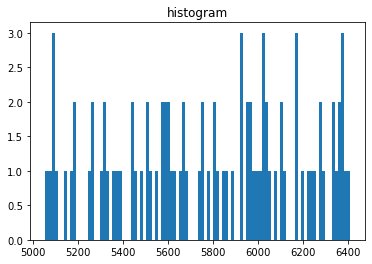

In [132]:
from matplotlib import pyplot as plt 
import numpy as np  
   
#a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
#plt.hist(a, bins = [0,20,40,60,80,100]) 
plt.hist(sum(X), bins=100)
plt.title("histogram") 
plt.show()

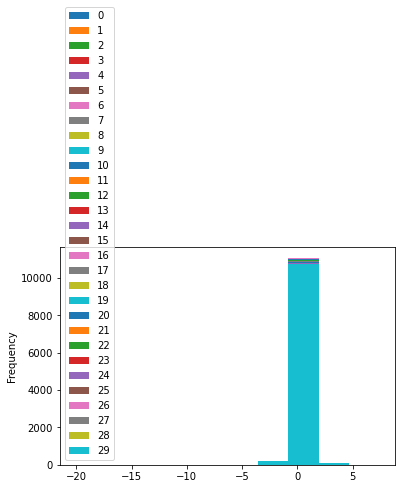

In [108]:
import pandas as pd
pd.DataFrame(Y).plot.hist();

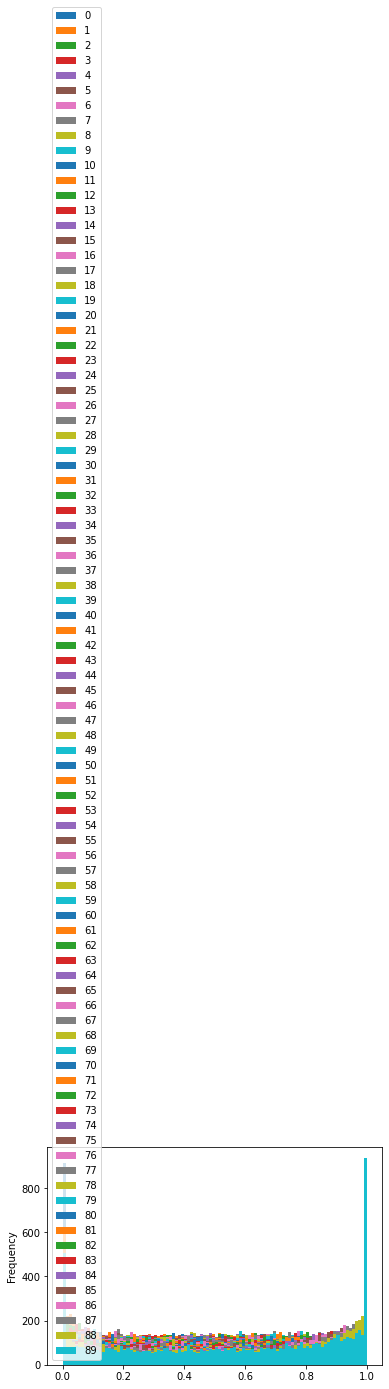

In [6]:
pd.DataFrame(X).plot.hist(bins=100);

# PROBLEMY
- przewidzenie 3 miesięcy do przodu (3 liczby - bo uśredniamy)
- przewidzenie 1 miesiąca w przód (1 liczba - bo uśredniamy)
- przewidzenie 1 miesiąca w przód (30 liczb - bo dzienne)
    
# Scenariusze do eksperyemntów
    
- Naural Network
    - Dane
        - input window size
        - output window size (PROBLEM)
        - averaging - najs miesięczne z ARIMY to miesięczne uśrednione dla LSTM jakoś tak (PROBLEM)
        - user log
    - Architektura
        - LSTM + Dense
        - LSTM x2 + Dense
        - LSTM x2
        - LSTM x3
        - GRU + Dense
        - GRU x2 + Dense
        - GRU x2
        - GRU x3
    - Hiperparametry
        - optimizer
        - activation
        - batchsize
        - units
        
- ARIMA
    - Dane
        - miesięcznie albo dziennie (granularność) windows shift
        - output window size (PROBLEM)
        - averaging ???? (PROBLEM)
        - user log ??UTY
    - Architektura
        - p
        - q
    - Hiperparametry
        - use log
        - PERIOD
        - P_VALUE_PERCENT
        - REGRESSION_TYPE_FOR_DF_TEST
        - AUTOLAG_FOR_DF_TEST
        - LJUNGBOX_BOXPIERCE_LAGS
        - PERIODS_TO_FORECAST

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

model = Sequential() 
optimizer='adam'
loss='mse'
N_STEPS = INPUT_WINDOW_SIZE
N_FEATURES = 1

# jak OUTPUT AVERAGING TRUE TO TRZEBA POKOMBINOWAĆ
OUTPUT_SIZE = OUTPUT_WINDOW_SIZE if not OUTPUT_AVERAGING else 1

X =  X.reshape((X.shape[0], X.shape[1], N_FEATURES))



# model.add(LSTM(50, input_shape=(N_STEPS, N_FEATURES), return_sequences=True))
# model.add(LSTM(30))
# model.add(Dense(OUTPUT_SIZE))

model.add(GRU(30, input_shape=(N_STEPS, N_FEATURES), return_sequences=True))
# model.add(GRU(30, return_sequences=True))
model.add(GRU(2))

model.compile(optimizer=optimizer, loss=loss) 

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 90, 30)            2970      
_________________________________________________________________
gru_17 (GRU)                 (None, 2)                 204       
Total params: 3,174
Trainable params: 3,174
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# from tensorflow.keras.utils import plot_model
# params = '30, 10, Dense'
# plot_model(
#     model, to_file=f'./images/models/model{params}.png', show_shapes=True, show_dtype=False,
#     show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
# )

In [37]:
batch_size = 128
validation_split=0.25
results = model.fit(X, Y, epochs=10, batch_size=batch_size, validation_split=validation_split)

Epoch 1/10
47/47 [==============================] - 6s 30ms/step - loss: 0.4504 - val_loss: 0.0708
Epoch 2/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0643 - val_loss: 0.0451
Epoch 3/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0361 - val_loss: 0.0302
Epoch 4/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0252 - val_loss: 0.0265
Epoch 5/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0228 - val_loss: 0.0245
Epoch 6/10
47/47 [==============================] - 1s 12ms/step - loss: 0.0219 - val_loss: 0.0233
Epoch 7/10
47/47 [==============================] - 1s 12ms/step - loss: 0.0201 - val_loss: 0.0223
Epoch 8/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0199 - val_loss: 0.0212
Epoch 9/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0194 - val_loss: 0.0198
Epoch 10/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0177 - val_loss: 0.0190


In [64]:
Dense(2222).__dict__

{'_self_setattr_tracking': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': True,
 '_instrumented_keras_model_class': False,
 '_trainable': True,
 '_stateful': False,
 'built': False,
 '_build_input_shape': None,
 '_saved_model_inputs_spec': None,
 '_input_spec': InputSpec(min_ndim=2),
 '_name': 'dense_1',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x25fe0030588>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x0000025FDCB552A0>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': True,
 '_layers': [],
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': [],
 '_expects_training_arg': False,
 '_default_training_arg': None,
 '_expects_mask_arg': False,
 '_dynamic': False,
 '_initial_weights': None,
 '_auto_track_sub_layers': True,
 '_preserve_input_structure_in

In [66]:
l = [1,2, 3]

for i, v in enumerate(l):
    print(i)
    print(len(l))

0
3
1
3
2
3


In [271]:
def visualize_training_results(results):
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

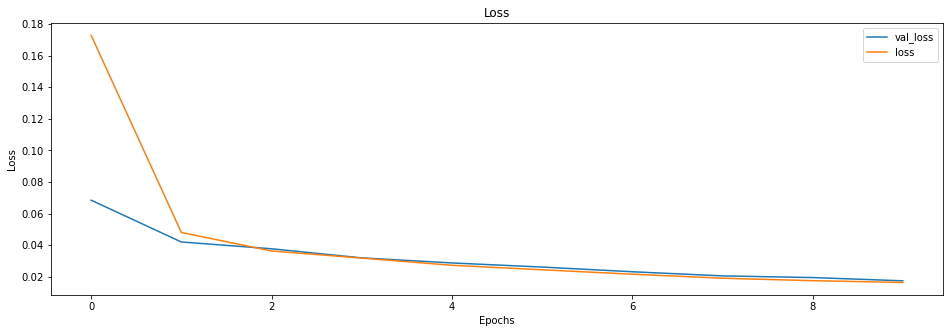

In [322]:
visualize_training_results(results)

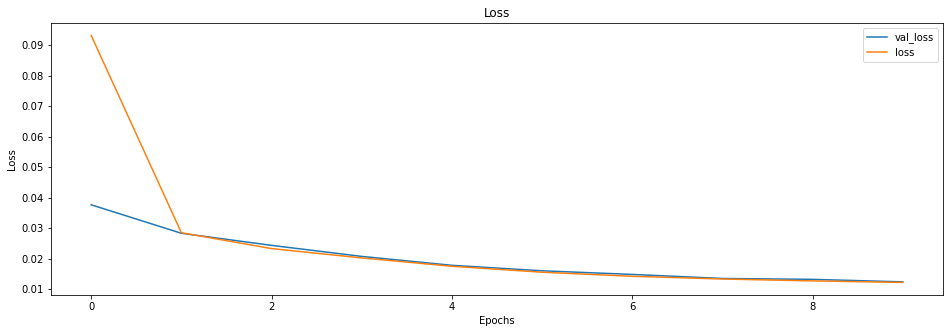

In [326]:
visualize_training_results(results)